In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

from __future__ import print_function

# 10.1 The k-means clustering algorithm

거리 계산, 주어진 집합에 대해서 k 개의 집합을 찾음 

* 의사코드 

        초기 중심을 설정하기 위한 k 개의 점 생성
        while 모든 점의 군집 배치에 변화가 없을 때까지 반복
            for 데이터 집합 내의 모든 점 순회
                for 모든 중신을 순회 할떄까지 반복
                    중신과 점사이의 거리를 계산
                assign 점을 거리가 가장 가까운 군집으로 재할당
            for 모든 군집에 대해 군집 내에 있는 점들을 평균을 계산 할때까지 반복 
                assign 각각의 군집에서 계산된 평균을 군집의 중심으로 변경 
                

초기 설정 : x, y 최소와 최대값 안에서 임의의 중심을 잡음 



In [4]:
# map 함수복습 
x = ['asdf', 'asd', 'ss','b']
r = []
for i in x :
    r.append(len(i))
r    
    
# map
r2 = map(len, x); r2
#= [len(x[0]), len(x[1], ... )]


[4, 3, 2, 1]

[4, 3, 2, 1]

In [94]:
import kMeans
import numpy as np

In [6]:
def loadDataSet(fileName):      
    dataMat = []                
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) 
        dataMat.append(fltLine)
    return dataMat

In [68]:
#유클리드 거리 계산
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2))) #la.norm(vecA-vecB)

In [83]:
# 주어진 데이터 집합에서 임의로 선택된 k 개의 중심을 원소로 하는 하나의 집합을 생성 
# 집합을 중심으로 최초 초기화
# dataSet 80x2 
def randCent(dataSet, k):
    # feature 개수
    n = np.shape(dataSet)[1] 
    
    # 임의로 안하고 우선 zero 로 초기화
    centroids = np.mat(np.zeros((k,n)))
    
    for j in range(n):
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        # np.random.rand(k,1) kx1 의 랜덤 밸류
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    
    # 한줄로 -->    
#     min_data = np.min(dataSet, axis=0)
#     print(min_data)
#     range_data = np.max(dataSet, axis=0)-min_data
#     print(range_data)
#     # min_data: matrix 1x2 / range_data: mat 1x2  np.random.rand(k,1) kx1
#     # range_data.A numpy array 로 broadcasting kx2 로 만들어줌 (mat 라서 안됨)
#     # 1xn + 1xn * kxn -> broadcasting 에 의해 kxn + kxn * kxn 
#     print(type(min_data), min_data)
#     print(type(min_data.A), min_data.A)
#     centroids = np.mat(min_data.A + range_data.A*np.random.rand(k,n))
    
    return centroids


In [84]:
datMat = np.mat(loadDataSet('data/ch10/testSet.txt'))
datMat.shape

(80L, 2L)

In [85]:
np.min(datMat[:,0])
np.max(datMat[:,0])
np.min(datMat, axis=0)
np.max(datMat, axis=0)

-5.3797129999999997

4.8381379999999998

matrix([[-5.379713, -4.232586]])

matrix([[ 4.838138,  5.1904  ]])

In [86]:
randCent(datMat, 4)

matrix([[-0.03298406, -3.56806515],
        [ 0.39082824, -2.64071998],
        [ 1.67599413,  1.48388028],
        [-5.13449401,  3.49405726]])

In [87]:
# kMeans 
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0] # row 개수 80
    # 어떤 점이 어떤 클러스터에 속하는지
    clusterAssment = np.mat(np.zeros((m,2)))
                                     
    # 중심점 초기화 randCent
    centroids = createCent(dataSet, k)
    
    # flag
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        
        # row
        for i in range(m):
            minDist = 99999; minIndex = -1 # 초기화 
            
            # 모든 centroids 에 대해 거리를 구함 
            for j in range(k):
                # 인스턴스 모든 컬럼의 거리를 구해서 
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                
                # 최소거리 update
                if distJI < minDist:
                    minDist = distJI; minIndex = j # centroids 번호
                    
            # 각 row 에 대한 min 값이면      
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            
            # 인덱스, 오차거리제곱(오차가 줄어드는 방향으로 중심을 옮김)
            clusterAssment[i,:] = minIndex, minDist**2 
        
        print(centroids)
        
        # centroids 중심값 update 
        for cent in range(k):
            # nonzero zero가 아닌 요소를 반환 nonzero(clusterAssment[:,0].A==cent) index 값
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            # ptsInClust 의 평균으로 update
            centroids[cent,:] = np.mean(ptsInClust, axis=0) 
            
    return centroids, clusterAssment

In [88]:
myCentroids, clusterAssment = kMeans(datMat, 4, distMeas=distEclud, createCent=randCent)

[[-3.02168296  0.67872982]
 [-1.64319028 -4.13844837]
 [ 1.15290773 -0.09569993]
 [-0.65990966 -3.00385797]]
[[-2.605345    2.35623864]
 [-3.53766144 -3.06629044]
 [ 2.8287018   1.4343227 ]
 [ 1.7308385  -3.45518233]]
[[-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.71502526  2.5965363 ]
 [ 2.54173689 -3.11892933]]
[[-2.46154315  2.78737555]
 [-3.53973889 -2.89384326]
 [ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]]


In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

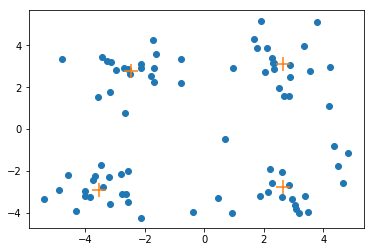

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(datMat.A[:, 0], datMat.A[:, 1])
ax.scatter(myCentroids.A[:, 0], myCentroids.A[:, 1], s=200, marker='+')

# 10.2 Improving cluster performance with postprocessing


* SSE, or sum of squared error : 같은 집단끼리의 중심으로부터의 거리를 전부 더함 

오차의 제곱은 중심으로부터 멀리 있는 점에게 가중치를 준다. 


* SSE 를 줄이는 방법 : 
    군집의 개수를 유지하면서 해결하는 방법 > SSE 가 가장 큰 분류를 2로 나눔 (k 를 2로 주고 해당 집합만 가지고 실행)
    
    
클러스터를 쪼갰다가 다시 merge 시킴 


* 가까운 중심끼리 병합 (두 중심을 병합) 
    - 가장 가까운 Centroid 병합 (Centroid 끼리 거리를 구해서)
    - 모든 가능한 쌍을 병합했을 때 총 SSE 가 가장 적게 증가하는 병합 요소를 찾음 
    
    

# 10.3 Bisecting k-means

local min 에 빠져서 성능이 안좋아 짐을 보안 

    전체 하나의 군집으로 보고 2개씩 나눔 
        다음에 분할 될 SSE 가 최소가 되는 군집을 선택 

    군집의 개수가 사용자가 정의하는 값이 될때까지 반복 
    
    또는 > SSE 가 가장큰 군집을 선택해서 분할하는 방법 


In [100]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    
    # 모든점의 평균점으로 초기화
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    
    centList =[centroid0] 
    
    # row
    for j in range(m):
        # 중심점과의 거리를 구함 
        clusterAssment[j,1] = distMeas(np.mat(centroid0), dataSet[j,:])**2
        
    # 설정한 개수 이상이 될때까지 
    while (len(centList) < k):
        lowestSSE = np.inf
        
        # centList
        for i in range(len(centList)):
            # clusterAssment index 가 i 인 인덱스 얻어옴 
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            
            # 이등분 시킴 
            centroidMat, splitClustAss = kMeans.kMeans(ptsInCurrCluster, 2, distMeas)
            # 나눴을 때 sum 값 
            sseSplit = sum(splitClustAss[:,1])
            # 나눠지지 않은 군집의 sum 값
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            
            # 최소 sse 보다 적으면 최적의 centroid 
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
                
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) 
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit) 
        print('the len of bestClustAss is: ', len(bestClustAss)) 
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss
    return np.mat(centList), clusterAssment

In [107]:
reload(kMeans)
dataMat3 = np.mat(kMeans.loadDataSet('data/ch10/testSet2.txt'))
centList, myNewAssments = biKmeans(dataMat3, 4)

<module 'kMeans' from 'kMeans.pyc'>

[[ 4.41523574  2.93382475]
 [-1.75086905 -1.99091402]]
[[ 2.76275171  3.12704005]
 [-1.73028592  0.20133246]]
[[ 2.93386365  3.12782785]
 [-1.70351595  0.27408125]]
sseSplit, and notSplit:  [[ 541.29762926]] 0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[ 3.08414569  3.74005091]
 [ 3.03685061  4.14646582]]
[[ 2.92343329  2.89682571]
 [ 2.992969    4.43684   ]]
[[ 2.82404644  2.837813  ]
 [ 3.3731325   4.28788725]]
[[ 2.61879214  2.73824236]
 [ 3.6690305   4.03686067]]
sseSplit, and notSplit:  [[ 27.81377618]] [[ 501.76833058]]
[[-4.56081458 -2.85904412]
 [-0.047507    4.34715232]]
[[-0.62407076 -2.58281924]
 [-2.89658695  3.43170811]]
[[-0.45965615 -2.7782156 ]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  [[ 67.22020008]] [[ 39.52929868]]
the bestCentToSplit is:  1
the len of bestClustAss is:  40
[[ 1.64356079  3.53137488]
 [ 1.54872094  4.29308838]]
[[ 2.91003433  2.95853389]
 [ 3.1483275   4.6514735 ]]
[[ 2.82404644  2.837813  ]
 [ 3.3731325   4.28788725]]
[[ 

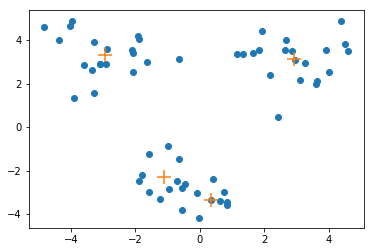

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(dataMat3.A[:, 0], dataMat3.A[:, 1])
ax.scatter(centList.A[:, 0], centList.A[:, 1], s=200, marker='+')